In [3]:
#Importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
FDI = pd.read_csv("FDI data.csv")
FDI.style.set_caption("Amount in US$ Millions)").format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,9.35,211.07,56.78,80.64,102.78,12.09,87.71,1405.04,349.29,265.53,556.43,2029.98,214.80,112.23,1079.02,103.02,180.40
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,2.66,0.74,25.57,40.53,74.88,39.50,166.44,313.75,184.60,212.78,230.70,159.13,286.88
8,ELECTRICAL EQUIPMENTS,79.76,65.76,34.71,73.20,97.40,39.50,76.85,653.74,417.35,728.27,153.90,566.39,195.87,134.31,574.83,444.88,2230.69
9,COMPUTER SOFTWARE & HARDWARE,228.39,419.39,314.24,368.32,527.90,1359.97,2613.33,1382.25,1543.34,871.86,779.81,796.35,485.96,1126.27,2296.04,5904.36,3651.71


In [6]:
FDI.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [7]:
#Columns Detail
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
Sectors=["Sector"]

In [8]:
#Ext deat info
FDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [9]:
FDI.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [10]:
#Creating Avg Exchange
Rates= [45.68,47.69,48.39,45.95,44.93,44.27,45.24,40.26,45.99,47.44,45.56,47.92,54.40,60.50,61.14,65.46,67.07]

In [11]:
#conv doll to rup
def multiplycol(df,col_list, num):
    for col in col_list:
        df[col]=df[col]*Rates[col_list.index(col)]/10
    return df

In [12]:
FDI_InUSD=FDI.copy()
FDI_2=multiplycol(FDI,Year,Rates)


In [13]:
FDI_2.style.set_caption("")

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,103.65,67.43,177.16,37.27,900.31,660.20,768.81,4733.57,4414.76,1991.91,5003.13,8559.18,7976.29,3434.16,2197.00,2987.01,9659.29
1,MINING,6.03,31.09,48.68,107.89,44.57,32.76,29.95,1788.99,157.10,827.35,362.25,683.58,314.92,77.02,4184.36,3408.31,373.92
2,POWER,408.47,3612.23,286.03,124.48,194.86,321.80,710.95,3980.43,4174.33,6033.37,5794.18,7918.20,2914.10,6449.78,4322.84,5687.16,7464.76
3,NON-CONVENTIONAL ENERGY,0.00,0.00,8.23,19.02,5.71,5.98,11.04,236.81,578.92,2953.23,976.81,2166.80,6019.47,2506.21,3765.92,5083.03,5255.40
4,COAL PRODUCTION,0.00,0.00,0.00,0.18,0.00,40.46,5.88,56.69,1.01,0.00,0.00,0.00,0.00,17.91,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,42.71,1006.59,274.76,370.54,461.79,53.52,396.80,5656.69,1606.38,1259.67,2535.10,9727.66,1168.51,678.99,6597.13,674.37,1209.94
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.18,2.43,0.00,14.97,6.08,0.00,18.79,2.87,152.34,109.07,1.03,8.13,510.00,361.57
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,11.95,3.28,115.68,163.17,344.37,187.39,758.30,1503.49,1004.22,1287.32,1410.50,1041.66,1924.10
8,ELECTRICAL EQUIPMENTS,364.34,313.61,167.96,336.35,437.62,174.87,347.67,2631.96,1919.39,3454.91,701.17,2714.14,1065.53,812.58,3514.51,2912.18,14961.24
9,COMPUTER SOFTWARE & HARDWARE,1043.29,2000.07,1520.61,1692.43,2371.85,6020.59,11822.70,5564.94,7097.82,4136.10,3552.81,3816.11,2643.62,6813.93,14037.99,38649.94,24492.02


In [15]:
#unpivoting
melt=pd.melt(FDI_InUSD,id_vars = Sectors, value_vars = Year,var_name = "Year", value_name = "FDI DOLLAR MILLION",ignore_index = True)
melt

,Sector,Year,FDI DOLLAR MILLION
0,METALLURGICAL INDUSTRIES,2000-01,22.69
1,MINING,2000-01,1.32
2,POWER,2000-01,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,53.17
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,105.14


In [17]:
#unpivoting
melt1=pd.melt(FDI_2,id_vars = Sectors, value_vars = Year,var_name = "Year", value_name = "FDI RUPEES CRORES",ignore_index = True)
melt1=round(melt1,2)
melt1

,Sector,Year,FDI RUPEES CRORES
0,METALLURGICAL INDUSTRIES,2000-01,103.65
1,MINING,2000-01,6.03
2,POWER,2000-01,408.47
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.61
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12479.92
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.17


In [18]:
#merge
Merged = melt1.merge(melt,how="left")
Merged

,Sector,Year,FDI RUPEES CRORES,FDI DOLLAR MILLION
0,METALLURGICAL INDUSTRIES,2000-01,103.65,22.69
1,MINING,2000-01,6.03,1.32
2,POWER,2000-01,408.47,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00,0.00
4,COAL PRODUCTION,2000-01,0.00,0.00
...,...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.61,53.17
1067,COIR,2016-17,0.00,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12479.92,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.17,105.14


In [19]:
#Sorting 
Sorted = Merged.sort_values(['Sector','Year'], ignore_index=True)
Sorted

,Sector,Year,FDI RUPEES CRORES,FDI DOLLAR MILLION
0,AGRICULTURAL MACHINERY,2000-01,16.63,3.64
1,AGRICULTURAL MACHINERY,2001-02,4.96,1.04
2,AGRICULTURAL MACHINERY,2002-03,65.23,13.48
3,AGRICULTURAL MACHINERY,2003-04,218.45,47.54
4,AGRICULTURAL MACHINERY,2004-05,0.00,0.00
...,...,...,...,...
1066,VEGETABLE OILS AND VANASPATI,2012-13,589.64,108.39
1067,VEGETABLE OILS AND VANASPATI,2013-14,130.38,21.55
1068,VEGETABLE OILS AND VANASPATI,2014-15,906.95,148.34
1069,VEGETABLE OILS AND VANASPATI,2015-16,224.00,34.22


In [20]:
print("\n Stats - Sectors\n",'-'*65,sep='')
print(pd.DataFrame(Sorted.groupby('Sector').describe().loc[:,:]).transpose())


 Stats - Sectors
-----------------------------------------------------------------
Sector                    AGRICULTURAL MACHINERY  AGRICULTURE SERVICES  \
FDI RUPEES CRORES  count               17.000000             17.000000   
                   mean               139.573529            568.894118   
                   std                172.900782           1370.805206   
                   min                  0.000000              2.710000   
                   25%                 13.270000             53.280000   
                   50%                 65.230000            200.010000   
                   75%                218.450000            512.620000   
                   max                519.030000           5798.210000   
FDI DOLLAR MILLION count               17.000000             17.000000   
                   mean                26.423529            112.985294   
                   std                 32.712807            289.004756   
                   min      

In [27]:
#replace Long values
first_column = FDI.iloc[:, 0]
print(first_column)

0                              METALLURGICAL INDUSTRIES
1                                                MINING
2                                                 POWER
3                               NON-CONVENTIONAL ENERGY
4                                       COAL PRODUCTION
                            ...                        
58    PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...
59                                                 COIR
60             CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES
61    CONSTRUCTION DEVELOPMENT: Townships, housing, ...
62                             MISCELLANEOUS INDUSTRIES
Name: Sector, Length: 63, dtype: object


In [31]:
Sectorwise_fdi = Sorted.groupby('Sector').sum()
Sectorwise_fdi.sort_values(by = 'FDI DOLLAR MILLION' , ascending = False)

,Year,FDI RUPEES CRORES,FDI DOLLAR MILLION
Sector,,,
"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)",2000-012001-022002-032003-042004-052005-062006...,316347.59,59476.49
COMPUTER SOFTWARE & HARDWARE,2000-012001-022002-032003-042004-052005-062006...,137276.82,24669.49
"CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects",2000-012001-022002-032003-042004-052005-062006...,115185.97,24293.09
TELECOMMUNICATIONS,2000-012001-022002-032003-042004-052005-062006...,130966.04,23946.01
AUTOMOBILE INDUSTRY,2000-012001-022002-032003-042004-052005-062006...,92622.66,16673.92
...,...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,2000-012001-022002-032003-042004-052005-062006...,278.37,67.28
COAL PRODUCTION,2000-012001-022002-032003-042004-052005-062006...,122.13,27.74
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",2000-012001-022002-032003-042004-052005-062006...,41.61,7.98


<Axes: title={'center': 'SECTOR_WISE FDI INFLOWS'}, xlabel='Sector', ylabel='FDI RUPEES CRORES'>

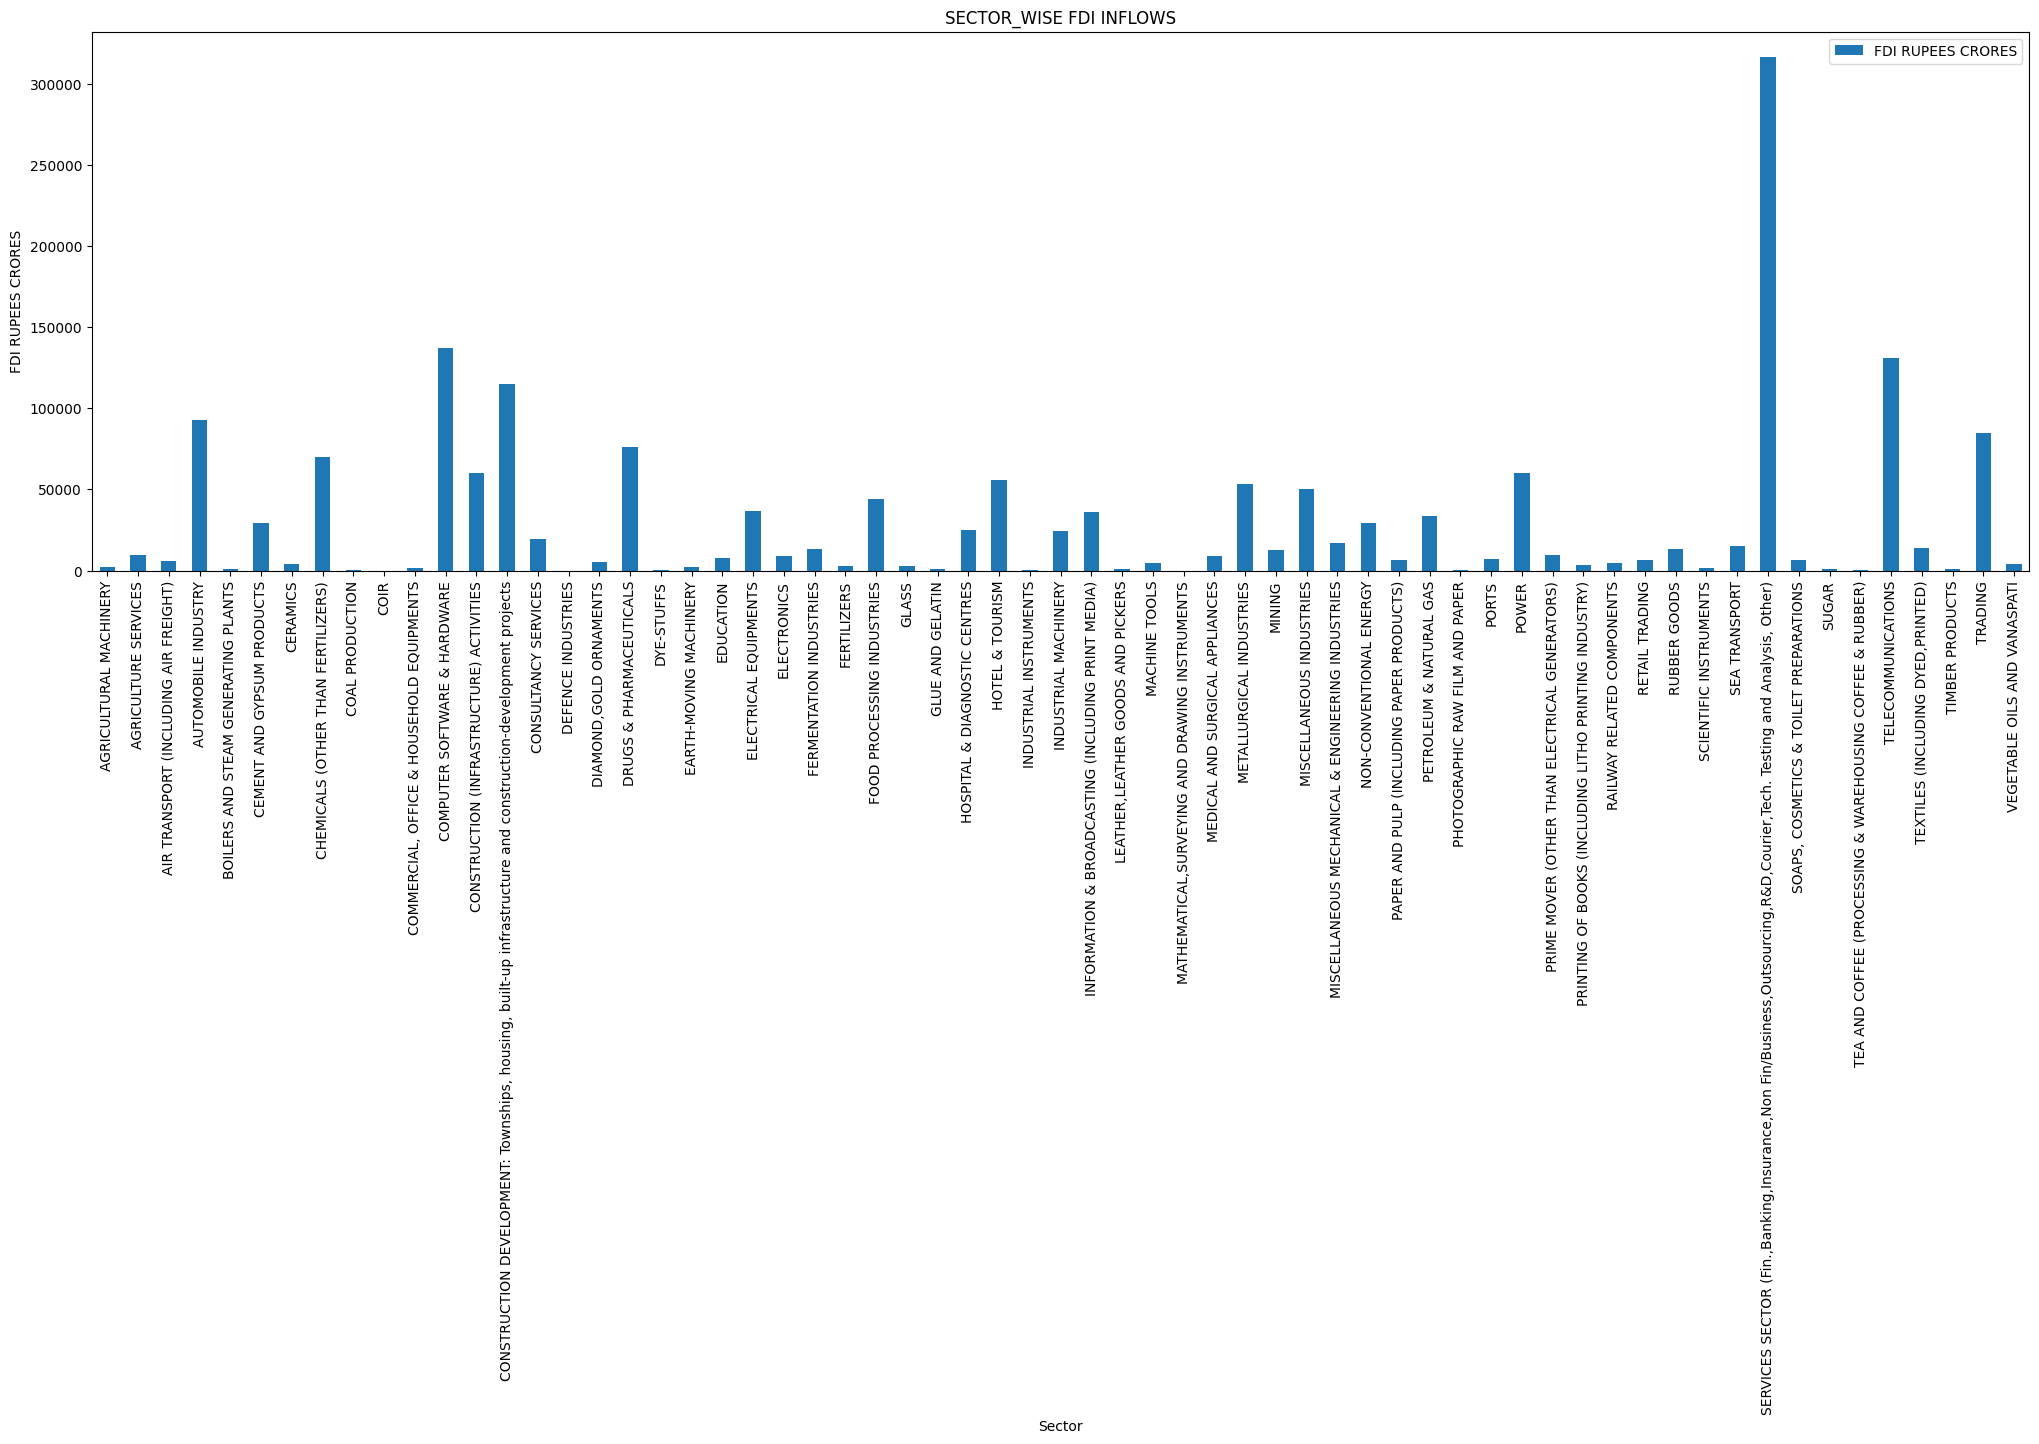

In [33]:
Sectorwise_fdi.plot(kind = 'bar', y = 'FDI RUPEES CRORES',figsize = (25,7),legend = True, title = "SECTOR_WISE FDI INFLOWS",ylabel="FDI RUPEES CRORES")

<Axes: title={'center': 'SECTOR_WISE FDI INFLOWS'}, xlabel='Sector', ylabel='FDI RUPEES CRORES'>

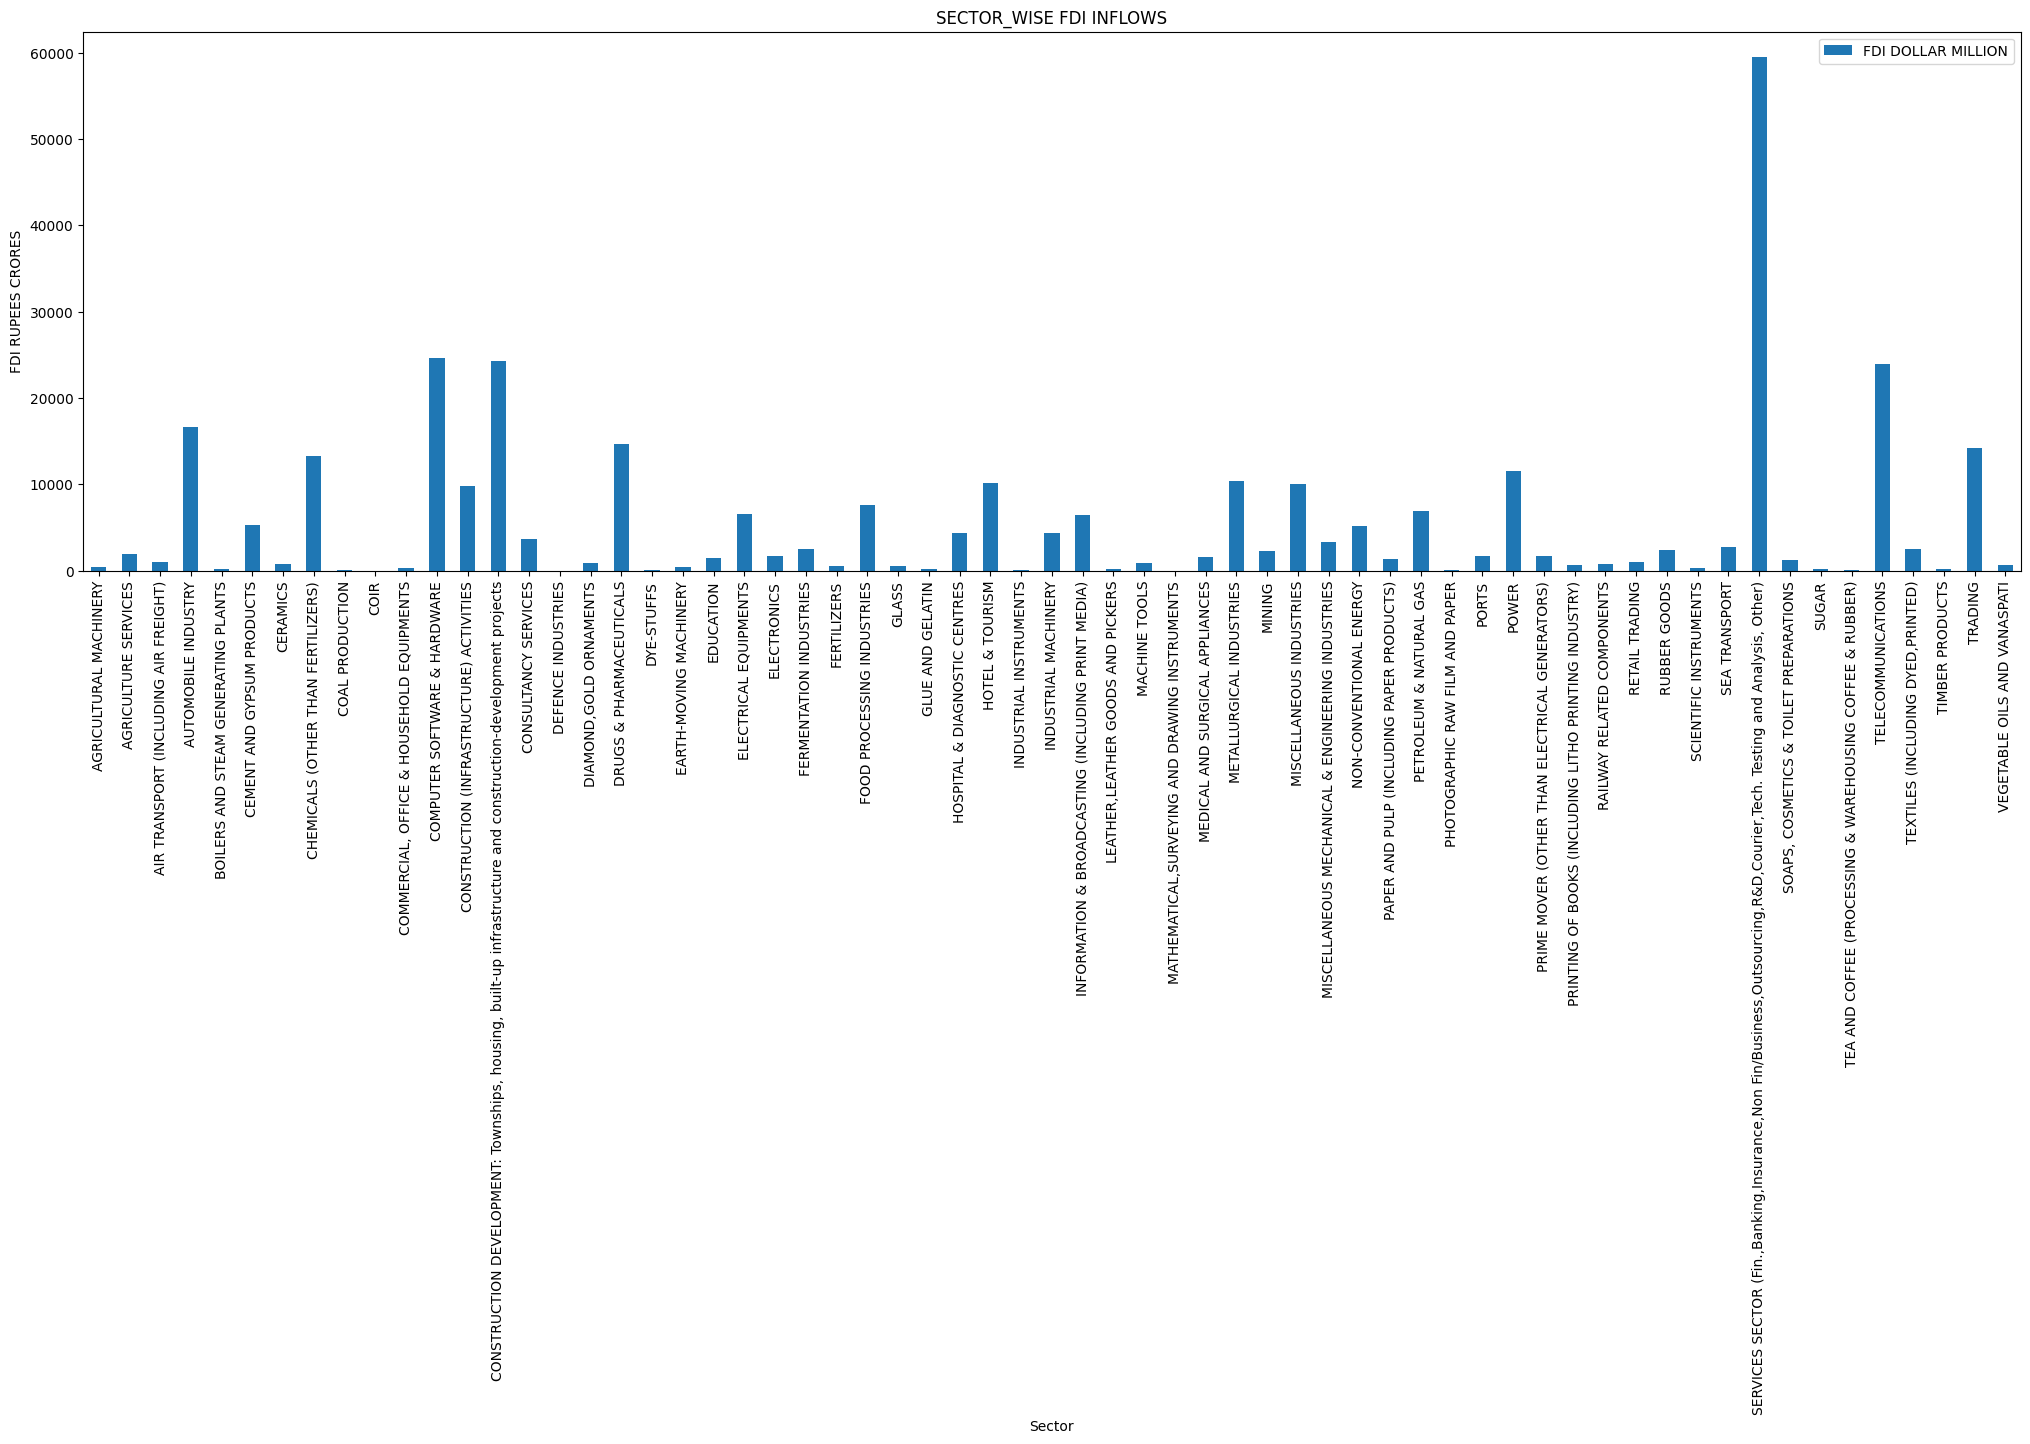

In [34]:
Sectorwise_fdi.plot(kind = 'bar', y = 'FDI DOLLAR MILLION',figsize = (25,7),legend = True, title = "SECTOR_WISE FDI INFLOWS",ylabel="FDI RUPEES CRORES")

In [35]:
Top_10_sectors = Sectorwise_fdi.nlargest(10, 'FDI RUPEES CRORES')

In [39]:
Total_fdi = round(melt1['FDI RUPEES CRORES'].sum(), 2)
Sum = Top_10_sectors ['FDI RUPEES CRORES'].sum()
Top_10_sectors['in %age']= round(Top_10_sectors['FDI RUPEES CRORES']/Sum*100, 2)
Top_10_sectors['in %age to Total Inflows']= round((Top_10_sectors['FDI RUPEES CRORES']/Total_fdi)*100, 2)
Top_10_sectors

,Year,FDI RUPEES CRORES,FDI DOLLAR MILLION,in %age,in %age to Total Inflows
Sector,,,,,
"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)",2000-012001-022002-032003-042004-052005-062006...,316347.59,59476.49,27.66,17.65
COMPUTER SOFTWARE & HARDWARE,2000-012001-022002-032003-042004-052005-062006...,137276.82,24669.49,12.00,7.66
TELECOMMUNICATIONS,2000-012001-022002-032003-042004-052005-062006...,130966.04,23946.01,11.45,7.31
"CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects",2000-012001-022002-032003-042004-052005-062006...,115185.97,24293.09,10.07,6.43
AUTOMOBILE INDUSTRY,2000-012001-022002-032003-042004-052005-062006...,92622.66,16673.92,8.10,5.17
TRADING,2000-012001-022002-032003-042004-052005-062006...,84487.83,14210.88,7.39,4.72
DRUGS & PHARMACEUTICALS,2000-012001-022002-032003-042004-052005-062006...,76377.64,14706.90,6.68,4.26
CHEMICALS (OTHER THAN FERTILIZERS),2000-012001-022002-032003-042004-052005-062006...,70031.18,13293.09,6.12,3.91
POWER,2000-012001-022002-032003-042004-052005-062006...,60397.97,11589.13,5.28,3.37


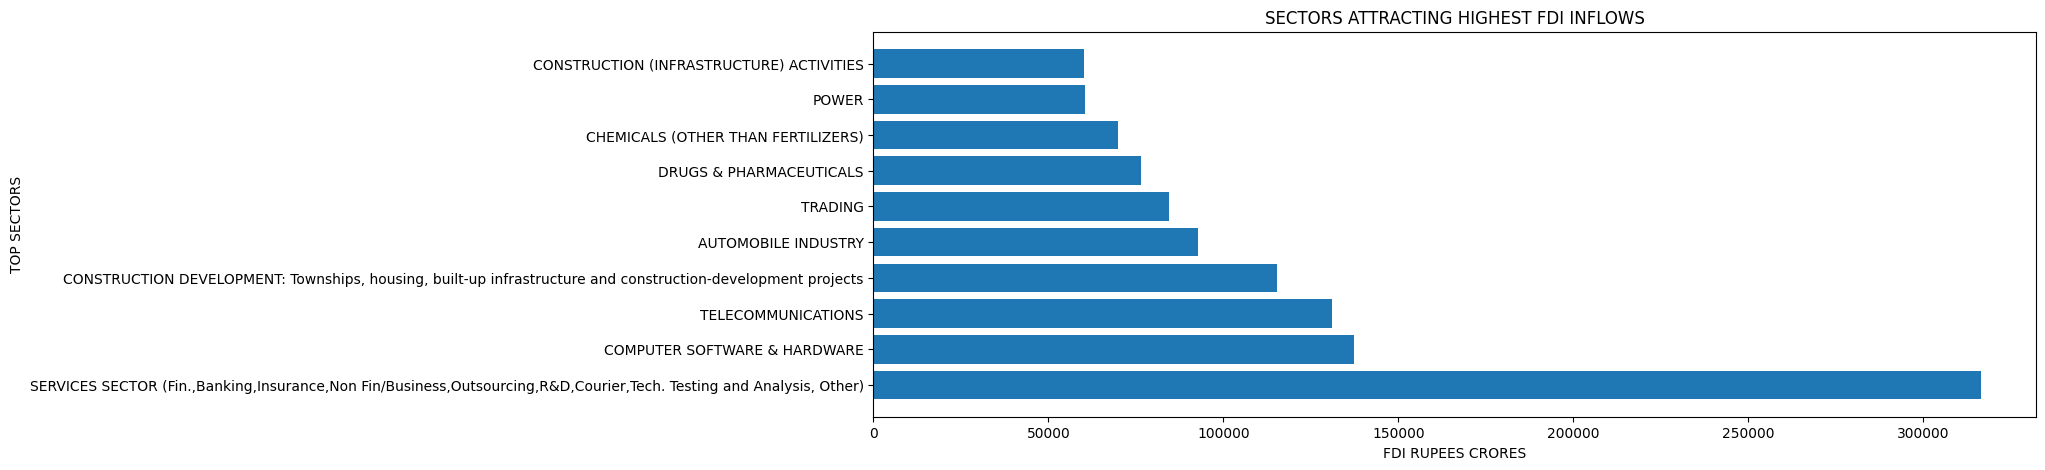

In [40]:
plt.figure(figsize=(15, 5))
plt.barh(Top_10_sectors.index, Top_10_sectors['FDI RUPEES CRORES'])
plt.title('SECTORS ATTRACTING HIGHEST FDI INFLOWS')
plt.xlabel('FDI RUPEES CRORES')
plt.ylabel('TOP SECTORS')
plt.show()

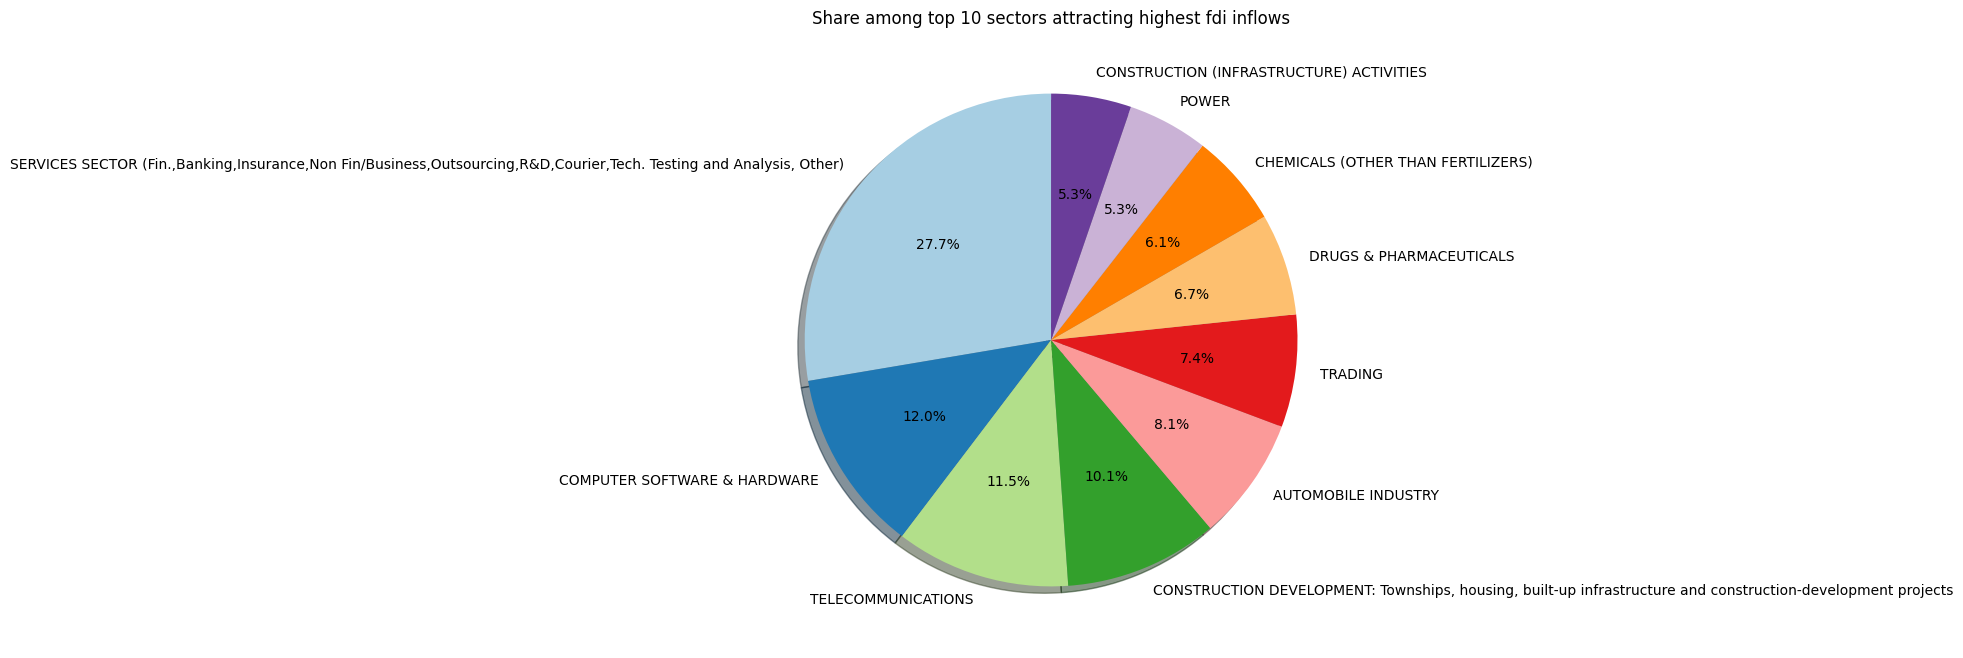

In [41]:
# Create a pie chart
plt.figure(figsize=(20, 8))
plt.pie(Top_10_sectors['FDI RUPEES CRORES'], labels=Top_10_sectors.index, autopct='%1.1f%%', shadow = True,startangle=90, colors=plt.cm.Paired.colors)
plt.title('Share among top 10 sectors attracting highest fdi inflows')
plt.show()

In [42]:
Bottom_5_sectors = Sectorwise_fdi.nsmallest(5, 'FDI RUPEES CRORES')
Sum = Bottom_5_sectors ['FDI RUPEES CRORES'].sum()
Bottom_5_sectors['in %age']= round(Bottom_5_sectors['FDI RUPEES CRORES']/Sum*100, 2)
Bottom_5_sectors['in %age to Total Inflows']= round((Bottom_5_sectors['FDI RUPEES CRORES']/Total_fdi)*100, 3)
Bottom_5_sectors

,Year,FDI RUPEES CRORES,FDI DOLLAR MILLION,in %age,in %age to Total Inflows
Sector,,,,,
COIR,2000-012001-022002-032003-042004-052005-062006...,21.64,4.06,4.42,0.001
DEFENCE INDUSTRIES,2000-012001-022002-032003-042004-052005-062006...,26.09,5.12,5.33,0.001
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",2000-012001-022002-032003-042004-052005-062006...,41.61,7.98,8.49,0.002
COAL PRODUCTION,2000-012001-022002-032003-042004-052005-062006...,122.13,27.74,24.93,0.007
PHOTOGRAPHIC RAW FILM AND PAPER,2000-012001-022002-032003-042004-052005-062006...,278.37,67.28,56.83,0.016


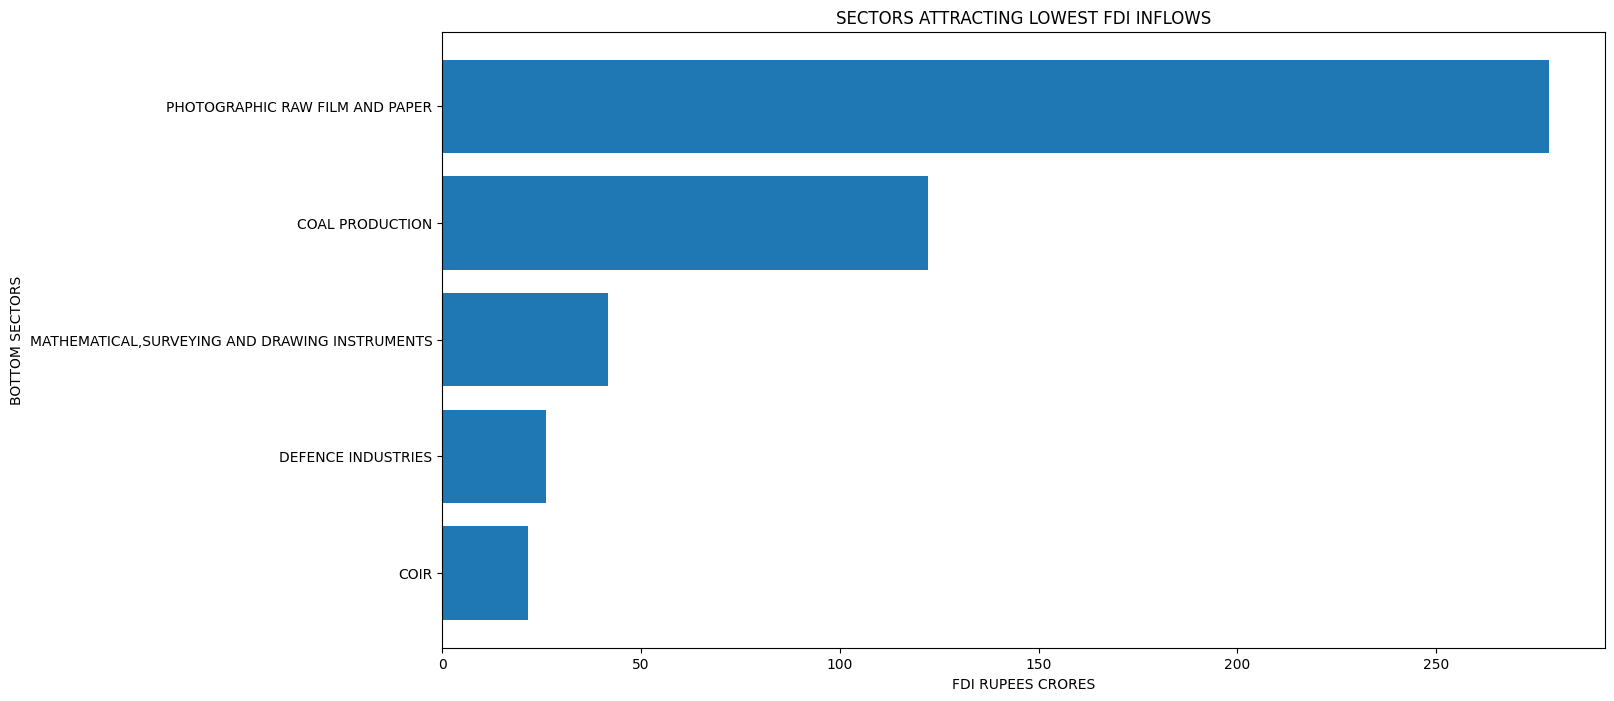

In [43]:
plt.figure(figsize=(15, 8))
plt.barh(Bottom_5_sectors.index, Bottom_5_sectors['FDI RUPEES CRORES'])
plt.title('SECTORS ATTRACTING LOWEST FDI INFLOWS')
plt.xlabel('FDI RUPEES CRORES')
plt.ylabel('BOTTOM SECTORS')
plt.show()

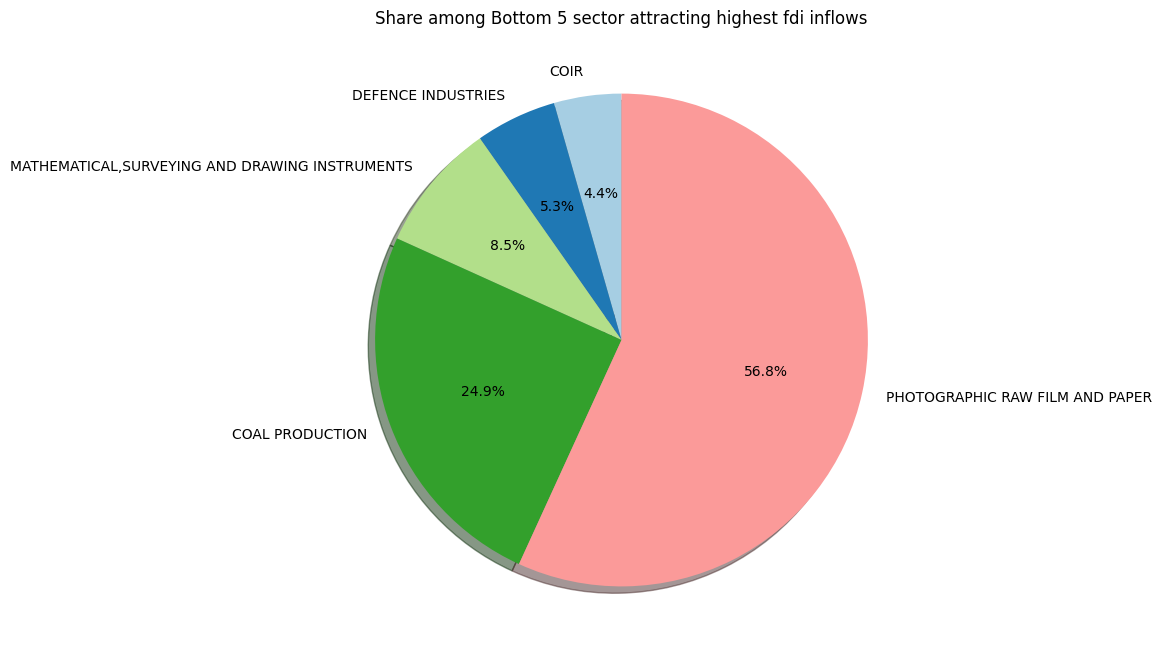

In [44]:
plt.figure(figsize=(20, 8))
plt.pie(Bottom_5_sectors['FDI RUPEES CRORES'], labels=Bottom_5_sectors.index, autopct='%1.1f%%', shadow = True,startangle=90, colors=plt.cm.Paired.colors)
plt.title('Share among Bottom 5 sector attracting highest fdi inflows')
plt.show()

In [46]:
melt2 = melt1[['Year','FDI RUPEES CRORES']]
melt2=round(melt2.groupby("Year").sum(),2)


In [47]:
melt2['% growth prev year'] = round(melt2.pct_change()*100,2)

In [48]:
melt2.fillna("-")

,FDI RUPEES CRORES,% growth prev year
Year,,
2000-01,10865.97,-
2001-02,19208.02,76.77
2002-03,13086.22,-31.87
2003-04,10053.15,-23.18
2004-05,14461.59,43.85
2005-06,24524.51,69.58
2006-07,56512.74,130.43
2007-08,98940.57,75.08
2008-09,144390.03,45.94


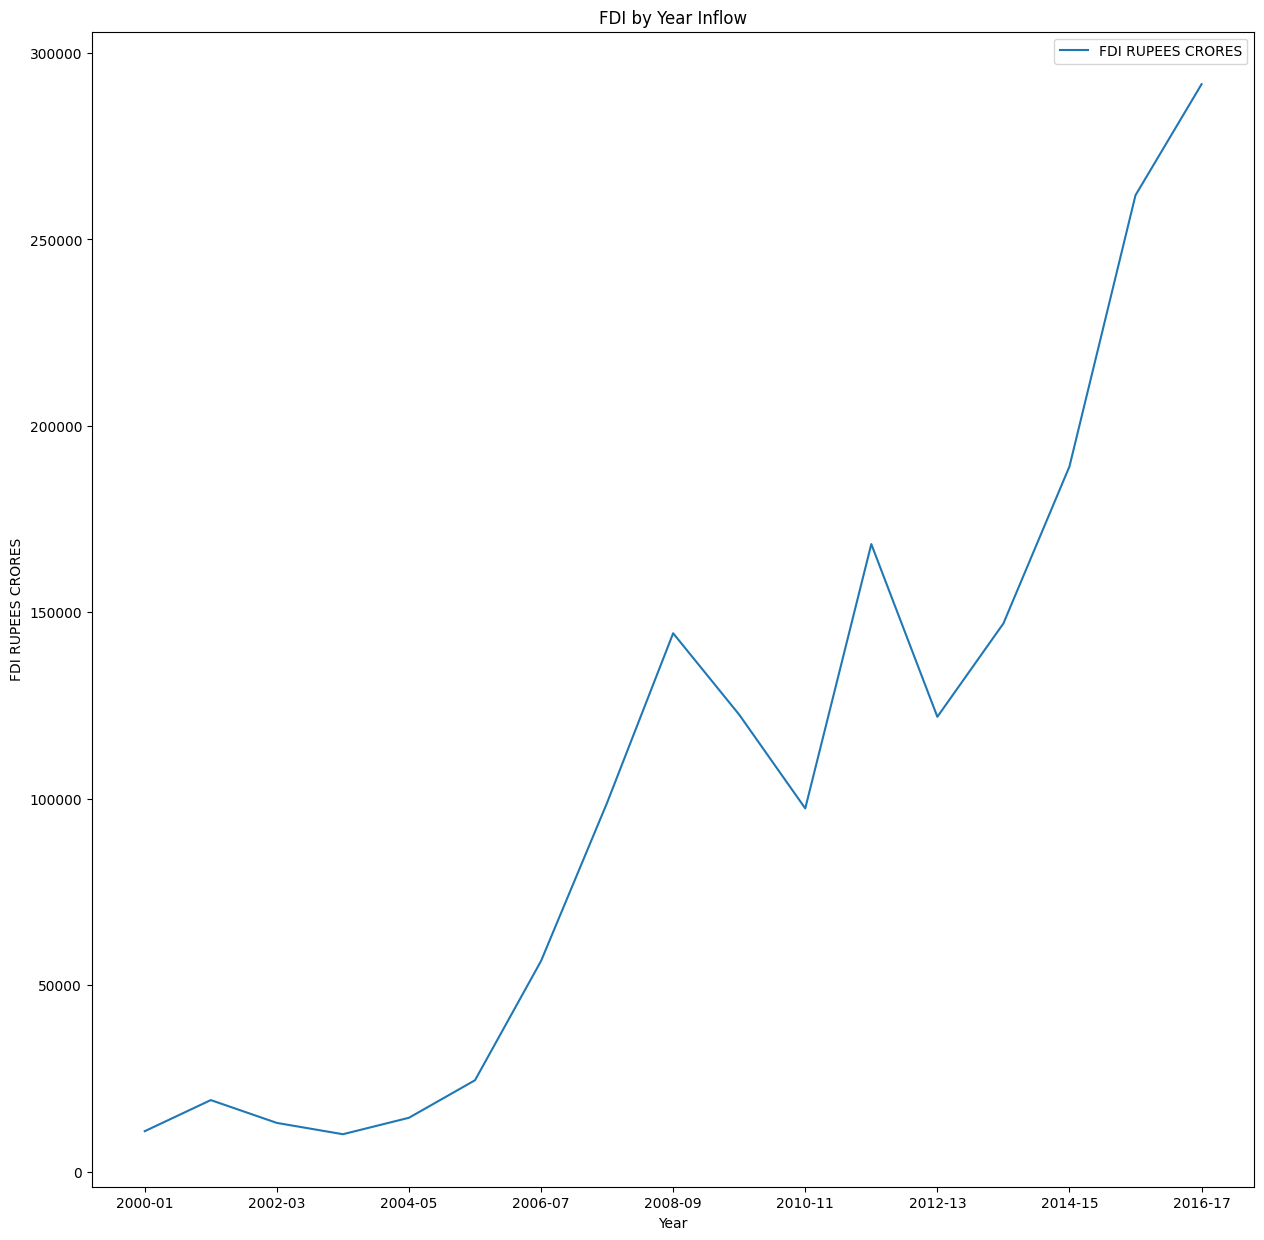

In [49]:
melt2.plot.line(y="FDI RUPEES CRORES",figsize=(15,15))
plt.ylabel("FDI RUPEES CRORES")
plt.title("FDI by Year Inflow")
plt.show()

In [51]:
Sectorwise_fdi['Year']= '2000-17'


KeyError: "['FDI DOLLARS MILLION'] not in index"